# Tutorial: change the telescope position angle

This notebook illustrates how to change the telesope orientation and how the observation is affected.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from warpfield.telescope import display_sources, get_subplot
from warpfield.telescope.jasmine import get_jasmine

In [2]:
from astropy.coordinates import SkyCoord, Angle
import astropy.units as u

An artificial source set is used in this notebook. Load the coordinate file and convert to the `SkyCoord` instance. The artificial sources are distributed around the Galactic center. The telescope is pointed toward the Galactic center too. The position angle of the telescope is set to 0.0 deg in the galactic coordinate.

In [3]:
coo = np.loadtxt('data/sample.coo')
src = SkyCoord(coo[:,0]*u.deg, coo[:,1]*u.deg, frame='galactic')

In [4]:
pointing = SkyCoord(0.0*u.deg,0.0*u.deg, frame='galactic')
position_angle = Angle(0.0, unit='degree')
jasmine = get_jasmine(pointing, position_angle)

The figure below shows the on-sky distribution of the artifical sources.

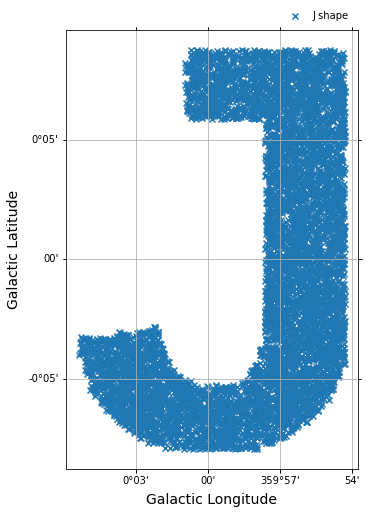

In [5]:
fig,ax = get_subplot(pointing, figsize=(8,8))
display_sources(ax, src, title='J shape')
fig.tight_layout()
plt.show()

Illustrate the detector's field-of-view and the artifical sources on the focal plane.

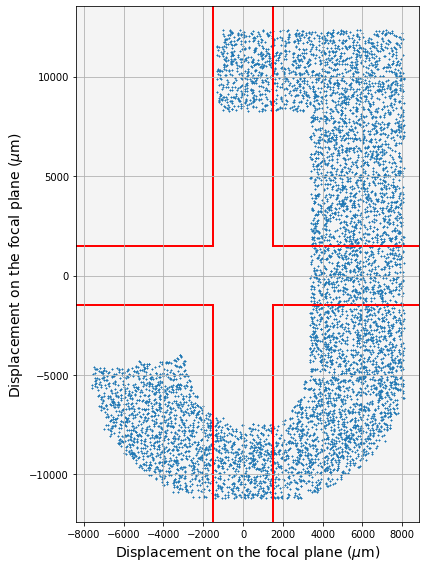

In [6]:
fig,ax = plt.subplots(figsize=(8,8))
jasmine.display_focal_plane(ax, src)
fig.tight_layout()
plt.show()

Then, we change the attitude of the telescope. The position angle of the telescope is rotated by 30&deg;.

In [7]:
position_angle = Angle(30.0, unit='degree')
jasmine = get_jasmine(pointing, position_angle)

Illustrate the layout of the focal plane again. This time, the J-shape is rotatd by -30&deg; since the position angle of the telescope is 30&deg;.

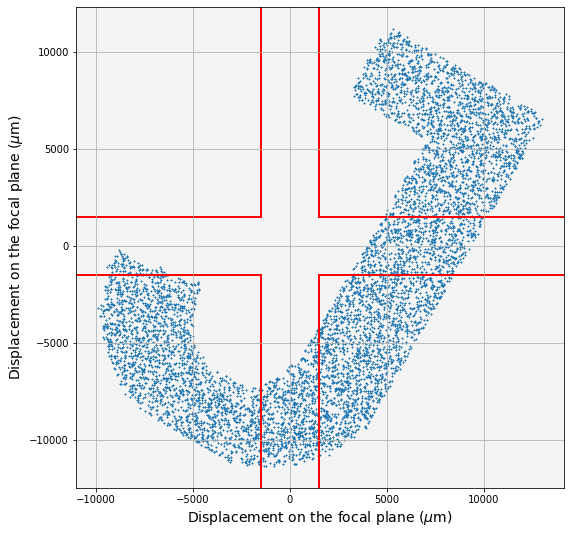

In [8]:
fig,ax = plt.subplots(figsize=(8,8))
jasmine.display_focal_plane(ax, src)
fig.tight_layout()
plt.show()

In the following case, the telescope is aligned to the ecliptic coordinates. The angle between the meridian lines of the ecliptic and galactic coordinates are about 60&deg; at the galactic center. The position angle of the J-shape is about 302&deg;.

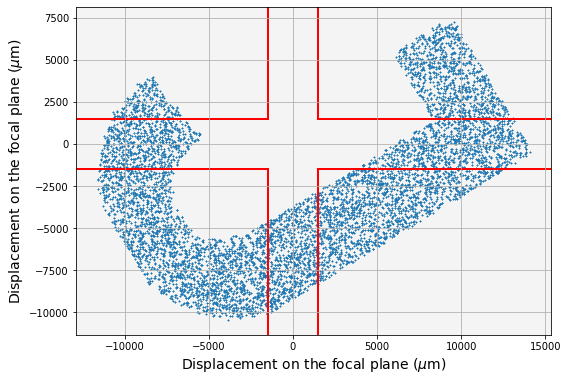

In [9]:
position_angle = Angle(0.0, unit='degree')
jasmine = get_jasmine(pointing.icrs, position_angle)

fig,ax = plt.subplots(figsize=(8,8))
jasmine.display_focal_plane(ax, src)
fig.tight_layout()
plt.show()

In the following sample, the `pointing` object is defined in the galactic coordinate but the detector is alined to the ecliptic coordinate. Rotate the positiona angle by 60&deg; and then a similar focal plane configuration is obtained.

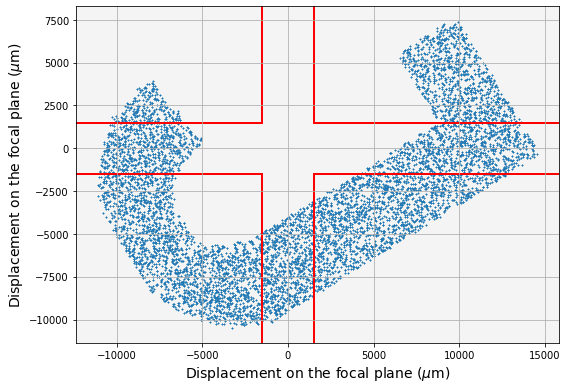

In [10]:
position_angle = Angle(360.0-302.0, unit='degree')
jasmine = get_jasmine(pointing, position_angle)

fig,ax = plt.subplots(figsize=(8,8))
jasmine.display_focal_plane(ax, src)
fig.tight_layout()
plt.show()

In turn, the telescope pointing is given in the ecliptic coordinates but the detctor is aligned to the galactic coordinates. The position angle of the telescope is set 302&deg;. The J-shape is upstanding on the focal plane.

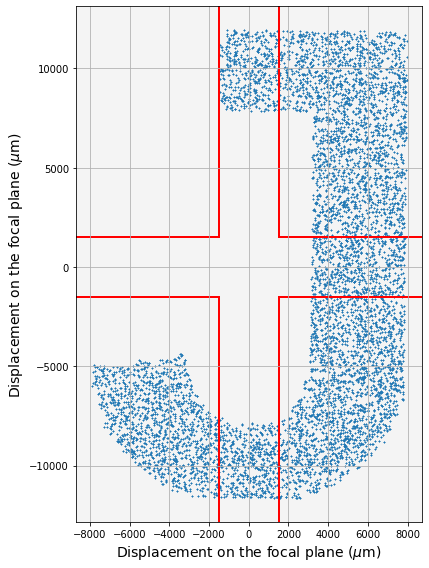

In [11]:
position_angle = Angle(302.0, unit='degree')
jasmine = get_jasmine(pointing.icrs, position_angle)

fig,ax = plt.subplots(figsize=(8,8))
jasmine.display_focal_plane(ax, src)
fig.tight_layout()
plt.show()